## Problem Definition
For this project we will investigate the Boston House Price dataset. Each record in the database
describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan
Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the UCI Machine Learning Repository1):
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000

11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

## Load The Dataset

In [53]:
# Load libraries
import numpy as np
from numpy import arange
import  matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [6]:
# load the dataset
filename = 'BostonHousing.csv'
df = pd.read_csv(filename)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 2. Summarize Data

In [7]:
#confirming the dimension of the data
#shape
df.shape # this show 506 instances and 14 attributes  MEDV is the output attribute.

(506, 14)

In [9]:
# get the info of the data including the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
# looking at the first 10 instances
df.head(10)  

# the data show different scales due to different unit. we rescale to mean and std using standscaler

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [14]:
# get the statistical summary
set_option('display.precision', 1)
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


We now have a better feeling for how different the attributes are. The min and max values
as well as the means vary a lot. We are likely going to get better results by rescaling the data
in some way.

In [17]:
#Now, let’s now take a look at the correlation between all of the numeric attributes.
# correlation
set_option('display.precision', 2)
df.corr(method='pearson')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


### b) Data visualizations

1. Unimodal Data Visualization
Let’s look at visualizations of individual attributes. It is often useful to look at your data
using multiple different visualizations in order to spark ideas. Let’s look at histograms of each
attribute to get a sense of the data distributions.

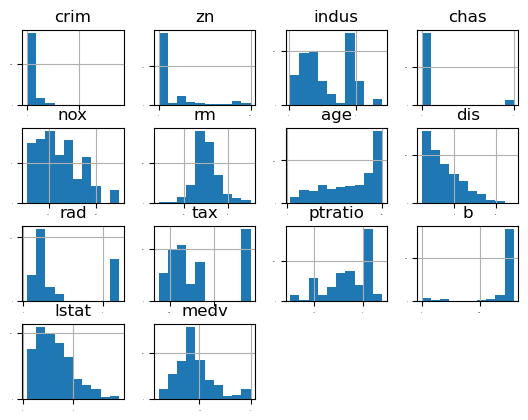

In [38]:
# Looking at each attribute using histogram 
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

We can see that some attributes have an exponential distribution, such as CRIM, ZN, AGE. We can see that others have a bimodal distribution such as RAD, B, CHAS, TAX and other may have gaussian distributions (MEDV, RM, NOX, LSTAT).

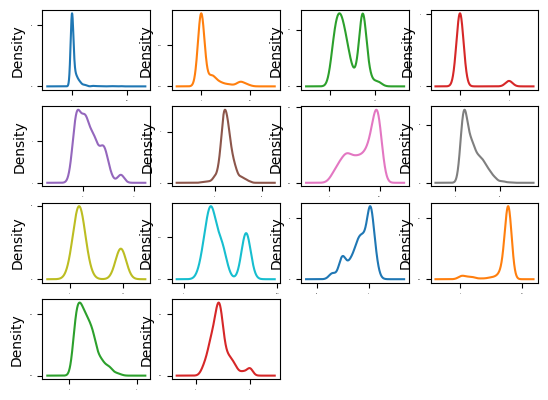

In [55]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
plt.show()

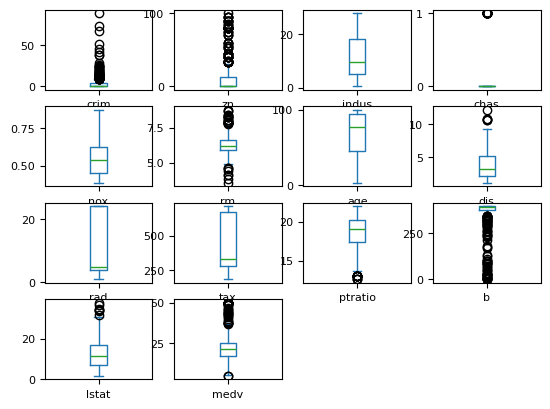

In [37]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
plt.show()

This helps point out the skew in many distributions so much so that data looks like outliers
(e.g. beyond the whisker of the plots).

## Multimodal Data Visualizations
Let’s look at some visualizations of the interactions between variables. The best place to start
is a scatter plot matrix.

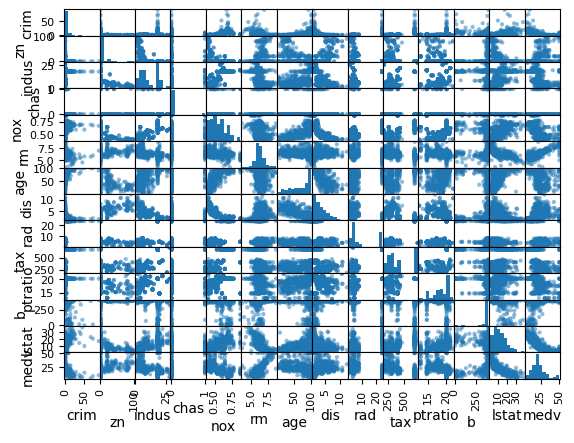

In [36]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

We can see that some of the higher correlated attributes do show good structure in their
relationship. Not linear, but nice predictable curved relationships.

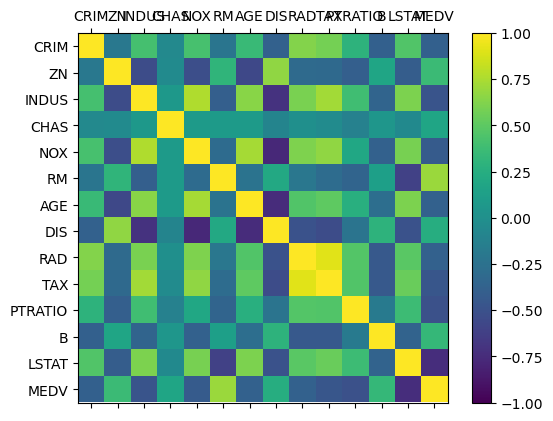

In [43]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [22]:
#plt.matshow(df.corr(method='pearson'))
#plt.show()

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Summary of Ideas
There is a lot of structure in this dataset. We need to think about transforms that we could use
later to better expose the structure which in turn may improve modeling accuracy. So far it
would be worth trying:

• Feature selection and removing the most correlated attributes.

• Normalizing the dataset to reduce the effect of differing scales.

• Standardizing the dataset to reduce the effects of differing distributions.
    
    With lots of additional time I would also explore the possibility of binning (discretization)of the data. This can often improve accuracy for decision tree algorithms.

## 3. Prepare Data

#### Validation Dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. 

We will use 80% of the dataset for modeling and hold back 20% for validation.

In [44]:
#split-out validation dataset
array = df.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
    test_size=validation_size, random_state=seed)

### Evaluate Algorithms: Baseline
We have no idea what algorithms will do well on this problem. Gut feel suggests regression
algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision
trees and even SVM may do well. I have no idea. Let’s design our test harness. We will use
10-fold cross-validation. The dataset is not too small and this is a good standard test harness
configuration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE
will give a gross idea of how wrong all predictions are (0 is perfect).

In [49]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this regression
problem. The six algorithms selected include:

• Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN).

• Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Regression (SVR) and k-Nearest Neighbors (KNN).

In [50]:
#Spot-Check Algorithm
models=[]
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

'''
The algorithms all use default tuning parameters. Let’s compare the algorithms. We will
display the mean and standard deviation of MSE for each algorithm as we calculate it and
collect the results for use later.
'''

# evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -26.389212 (18.986465)
SVR: -67.824705 (32.801530)


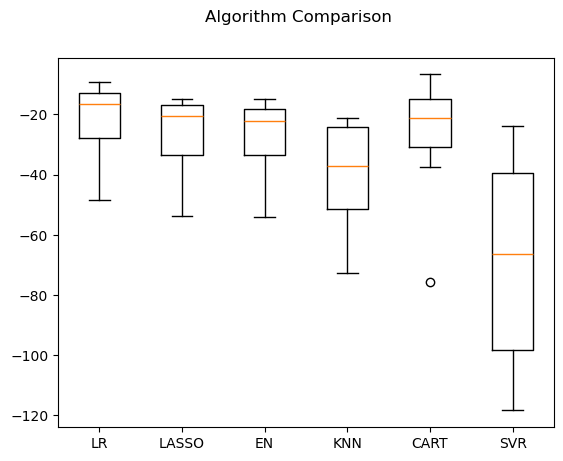

In [52]:
### from the result displayed above LR has the lowest Mean_Squared_Error, followed by CART decionTree
## Let look at the distribution of scores across all cross-validation folds by algorithm.
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see similar distributions for the regression algorithms and perhaps a tighter distribution
of scores for CART.

The differing scales of the data is probably hurting the skill of all of the algorithms and
perhaps more so for SVR and KNN. In the next section we will look at running the same
algorithms using a standardized copy of the data.

### Evaluate Algorithms: Standardization

We suspect that the differing scales of the raw data may be negatively impacting the skill of
some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of
zero and a standard deviation of 1. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross-validation test harness. That way we can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [58]:
# standize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKCART: -25.045385 (16.607149)
ScaledSVR: -29.570433 (18.052964)
ScaledKNN: -21.456867 (15.016218)


Executing the model with standardscaler had a great impact on the models expecially
SVR driving the Mean Squared Error lower that other models

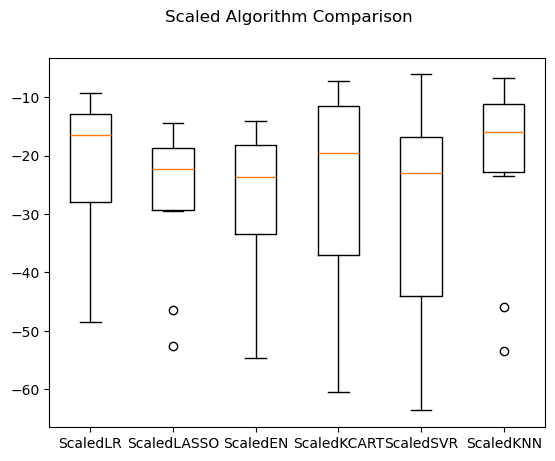

In [59]:
## Let look at the distribution of scores across all cross-validation folds by algorithm.
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Improve Results With Tuning
We know from the results in the previous section that KNN achieves good results on a scaled
version of the dataset. But can it do better. The default value for the number of neighbors in
KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if
we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary
range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold
cross-validation on a standardized copy of the training dataset.


In [66]:
# KNN Algorithm tuning: Tune the Parameters of the KNN Algorithm on the Standardized Dataset.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [67]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


###### From the tuning using the GRIDCV, the best k value and parameter is:

Best: -19.497829 using {'n_neighbors': 1}

### Improve Results With Tuning on SVR

In [68]:
##### SVR Algorithm tuning: Tune the parameters of the SVC Algorithm on the Standardized dataset

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
            'degree':[3,5,7,9],
            'C':[1,5,10],
            'gamma':('scale','auto')}

model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [69]:
'''
We can display the mean and standard deviation scores as well as the best performing value
for k below.
'''
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -15.033273 using {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
-23.051365 (15.233722) with: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
-31.302969 (15.628143) with: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
-29.529957 (18.092459) with: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
-31.157997 (15.202601) with: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'sigmoid'}
-23.051365 (15.233722) with: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
-31.343080 (15.817351) with: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
-29.527457 (18.030181) with: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
-31.261653 (14.776047) with: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid'}
-23.051365 (15.233722) with: {'C': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'linear'}
-38.768825 (21.457921) with: {'C': 1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
-29.529957 (18.092459) with: {'C': 1, 'degr

##### From the tuning using the GRIDCV, the best parameter are:
Best: -15.033273 using {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}


### Evaluate Algorithms: Ensemble Method

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

• Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).

• Bagging Methods: Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross-validation and pipelines that
standardize the training data for each fold.

In [70]:
#Ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
    AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
    GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
    RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
    ExtraTreesRegressor(n_estimators=10))])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -16.196780 (8.528856)
ScaledGBM: -10.924171 (8.537071)
ScaledRF: -14.327552 (11.438443)
ScaledET: -10.482863 (4.992343)


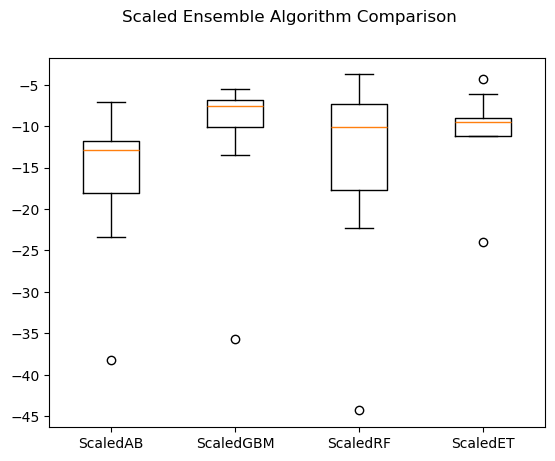

In [71]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Using the ensembles method to improve the model gives a well reduces and better 
result. With ExtraTree performing the best.
It looks like Extra Trees has a better mean score, and it also looks like Gradient Boosting
has a similar distribution and perhaps a better median score.

In [72]:
'''
Given that the ensemble techniques used the default parameters. We will be tuning 
ExtraTree to further lift the performance
'''

'\nGiven that the ensemble techniques used the default parameters. We will be tuning \nExtraTree to further lift the performance\n'

### Tune Ensemble Methods

In [74]:
# To tune the extratrees we will need to insert different n_estimator starting from 50
# the default number ia 100 trees in the forest

# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [75]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.016279 using {'n_estimators': 150}
-9.431419 (6.682316) with: {'n_estimators': 50}
-9.141589 (6.323830) with: {'n_estimators': 100}
-9.016279 (6.244052) with: {'n_estimators': 150}
-9.066266 (6.212076) with: {'n_estimators': 200}
-9.141895 (6.328563) with: {'n_estimators': 250}
-9.162757 (6.407527) with: {'n_estimators': 300}
-9.161324 (6.423344) with: {'n_estimators': 350}
-9.152246 (6.491571) with: {'n_estimators': 400}


#### BEST TUNING CONFIGURATION
The Best configuration was n_estimators = 150 resulting in the following:
    
    MSE: -9.016279 using {'n_estimators': 150}

## Tune scaled GBM

In [84]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [85]:
# printing the best configuration using GBM
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': 400}
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}


# 6. Finalize Model Using Extra Tree

In this section we will finalize the Extra Tree model and evaluate it on our hold out
validation dataset. First we need to prepare the model and train it on the entire training dataset.
This includes standardizing the training dataset before training.

In [81]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=150)
model.fit(rescaledX, Y_train)

ExtraTreesRegressor(n_estimators=150, random_state=7)

In [82]:
#We can then scale the inputs for the validation dataset and generate predictions.
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

12.74953946840959


### 6b. Finalize Model Using Gradient Boosting Model

In [88]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [89]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


In [ ]:
'''
#Save Model Using Pickle
from pickle import dump
from pickle import load
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

link: https://docs.python.org/3/library/pickle.html
'''


'''
link: https://pypi.org/project/joblib/

from pickle import dump
from pickle import load
# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)

# some time later...

# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)
'''

## CONCLUSION
From the analysis, modeling and optimisation of the data and model... 
The Ensemble method of improving the model gives a lower error MSE and 
tuning parameter generated a much better model. Making over 70% efficient 
to predicting the MedV of the Boston Housing than the other model and optimisation techniques used.

Gradient Boosting Model, proves to be the best for the analysis. This will be save and used for future predictions.